In [198]:
import streetscapes as scs

import skimage as ski

from rich import print as rp

from PIL import Image
from PIL import ImageColor


from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import numpy as np

from streetscapes.models import DinoSAM

In [199]:
model = DinoSAM()

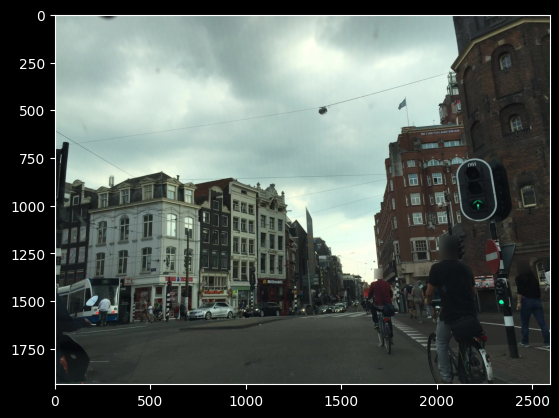

In [242]:
# img_name = "1362561054167230.jpeg"
# img_name = "5439790.jpeg"
img_name = "8361801.jpeg"
# img_name = "1208611.jpeg"
# img_name = "1209204.jpeg"

IMG_DIR = scs.conf.OUTPUT_DIR / "images"
img = IMG_DIR / img_name
img_data = Image.open(img)
# img_data = img_data.resize((np.array(img_data.size) // 4).tolist())

plt.imshow(np.array(img_data))

In [244]:
categories = {
    "sky": None,
    "building": {
        "window": None,
        "door": None
    },
    "tree": None,
    "car": None,
    "road": None,
}


categories = model.flatten_categories(categories)
categories

{'sky': [],
 'building': ['window', 'door'],
 'window': [],
 'door': [],
 'tree': [],
 'car': [],
 'road': []}

In [233]:
objects = {
    "door": "#ff00ff",
    "tree": "#fff00f",
    "car": "#00f00f",
    "road": "#ff0f70",
    "building": "#ff7700",
    "window": "#77ffff",
    "sky": "#000099",
}

text_prompt = '. '.join(objects.keys())

In [234]:
# results = model.segment([img_data], [text_prompt])
results = model.segment({img_name: img_data}, [text_prompt])

Streetscapes | 2025-02-13@15:48:32 | Detecting objects...


Streetscapes | 2025-02-13@15:48:45 | Segmenting patches...
Streetscapes | 2025-02-13@15:49:02 | Extracted 85 masks for '8361801.jpeg'


In [235]:
results

[{'index': 0,
  'name': '8361801.jpeg',
  'image': array([[[158, 177, 173],
          [158, 177, 173],
          [157, 178, 173],
          ...,
          [103, 104,  98],
          [ 99, 100,  94],
          [ 96,  97,  91]],
  
         [[159, 178, 174],
          [159, 178, 174],
          [158, 179, 174],
          ...,
          [ 95,  96,  90],
          [ 97,  98,  92],
          [ 98,  99,  93]],
  
         [[160, 179, 175],
          [160, 179, 175],
          [159, 180, 175],
          ...,
          [ 92,  93,  87],
          [ 94,  95,  89],
          [ 95,  96,  90]],
  
         ...,
  
         [[ 40,  45,  48],
          [ 36,  41,  44],
          [ 39,  44,  47],
          ...,
          [ 56,  59,  52],
          [ 59,  62,  55],
          [ 57,  60,  53]],
  
         [[ 45,  50,  53],
          [ 39,  44,  47],
          [ 37,  42,  45],
          ...,
          [ 52,  55,  48],
          [ 56,  59,  52],
          [ 55,  58,  51]],
  
         [[ 41,  46,  49],
  

==[ building:
[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]

In [237]:
def hex2rgb(colour: str) -> tuple[int,...]:
    return np.array(ImageColor.getcolor(colour, "RGB"), dtype=np.uint8)

In [238]:
gs = np.dstack(
    [
        0.5
        * ski.exposure.rescale_intensity(
            ski.color.rgb2gray(img_data), out_range=np.uint8
        )
    ]
    * 3
).astype(np.uint8)


masks = results[0]["categories"]

In [239]:
annotated = np.zeros_like(img_data)

handles = []
# for label in ["sky", "road", "building", "car", "window", "door"]:
for label in ["building"]:
    if label not in masks:
        continue
    annotated[masks[label] > 0] = hex2rgb(objects[label]) // 2
    handles.append(
        mpatches.Patch(
            color=objects[label],
            label=label,
        )
    )

annotated += gs
annotated.shape

(1936, 2592, 3)

/tmp/ipykernel_826764/3005220207.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


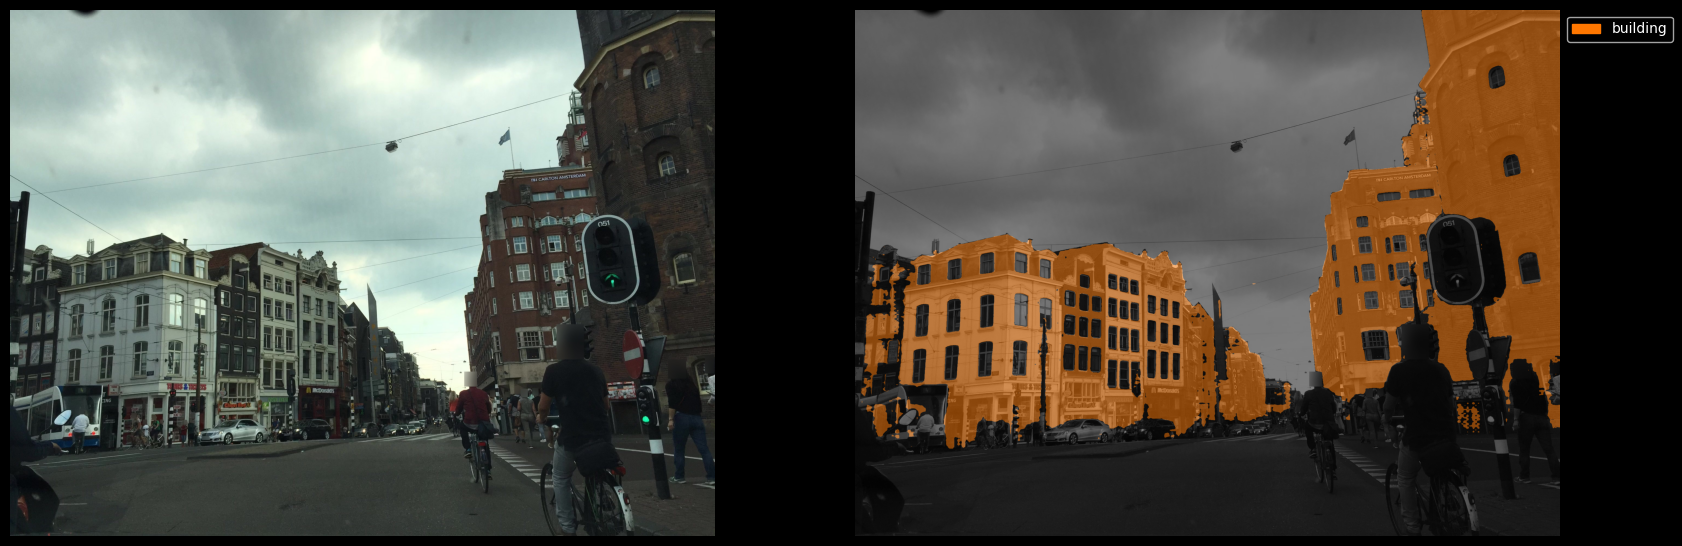

In [240]:
(fig, axes) = plt.subplots(1, 2, figsize=(20,8))

axes[0].axis('off')
axes[0].imshow(img_data)

axes[1].axis("off")
axes[1].imshow(annotated)
axes[1].legend(handles=handles, loc="upper left", bbox_to_anchor=(1, 1))

fig.show()